This is a method I saw on

In [4]:
import re
import math
from collections import Counter
from typing import List

def calculate_entropy(text: str) -> float:
    text = re.sub(r'[^\w\s]', '', text.lower())
    text = re.sub(r'\s+', ' ', text).strip()
    if not text:
        return 0.0
    probabilities = [freq/len(text) for freq in Counter(text).values()]
    entropy = -sum(p * math.log2(p) for p in probabilities)
    print("Entropy:", entropy)
    return entropy

def detect_ai_patterns(text: str) -> bool:
    common_phrases = [
        "In conclusion,", "However,","On the other hand,",
        "In summary,", "As a result,","Therefore,",
        "It is important to note that", "For instance,",
        "Moreover,","Consequently,"
    ]
    for phrase in common_phrases:
        if phrase in text:
            return True
    return False

def is_ai_generated(text:str) -> str:
    entropy = calculate_entropy(text)
    ai_patterns = detect_ai_patterns(text)
    if entropy < 3.5:
        return "High chance of being ai-generated."
    elif ai_patterns:
        return "Likely ai-generated due to detected linguistic patterns."
    else:
        return "Unlikely to be ai-generated."

sample_text = input("Enter text to analyze:")
result = is_ai_generated(sample_text)
print(result)

Entropy: 4.144429125664692
Unlikely to be ai-generated.


In [6]:
from transformers import GPT2LMHeadModel, GPT2TokenizerFast
import torch
import math

model_name = "gpt2"
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2TokenizerFast.from_pretrained(model_name)

sample_text = input("Enter text to analyze:")
inputs = tokenizer(sample_text, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs, labels=inputs["input_ids"])
    loss = outputs.loss
    perplexity = math.exp(loss.item())

print(f"Perplexity: {perplexity:.2f}")
# higher perplexity is more human. I got around 50 for LLM's output and 90 for some of my own personally written drivel.

Perplexity: 93.62


Prediction: {'object': 'list', 'data': [{'object': 'embedding', 'embedding': [-0.03792376071214676, -0.06529328972101212, -0.028565583750605583, -0.040799543261528015, 0.00596120860427618, 0.0031030757818371058, -0.0018239407800137997, 0.1068129763007164, -0.017380261793732643, 0.007695924025028944, -0.001719857333227992, 0.004472615197300911, 0.027459917590022087, -0.030116543173789978, -0.05805250257253647, 0.04847722873091698, 0.019624747335910797, -0.02935696206986904, -0.006049638614058495, 0.008871727623045444, -0.010300429537892342, 0.010327208787202835, -0.035202424973249435, 0.016469519585371017, 0.015330265276134014, -0.009265860542654991, -0.0014114435762166977, -0.019518589600920677, -0.003027715254575014, -0.04014136269688606, -0.01360007468611002, 0.08069770783185959, 0.04587656632065773, 0.022869454696774483, -0.003846131032332778, -0.015656059607863426, 0.052341438829898834, 0.010638166218996048, -0.03769179433584213, 0.00240544811822474, -0.05692730471491814, -0.014612

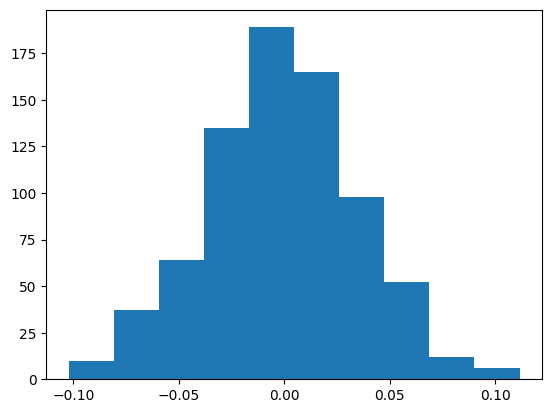

In [6]:
import requests
import json
import matplotlib.pyplot as plt

# Replace with your endpoint URL and key
endpoint_url = "http://127.0.0.1:1234/v1/embeddings"
input_text = input("Enter the text to check for AI generation: ")
# Example input data
input_data = {
    "model":"text-embedding-ai-text-detector-hc3",
    "input":input_text
}

# Set headers
headers = {
    "Content-Type": "application/json"
}

# Make the POST request
response = requests.post(endpoint_url, headers=headers, json=input_data)

# Print the response
if response.status_code == 200:
    print("Prediction:", response.json())
    data = response.json().get("data")[0]

    plt.hist(data.get("embedding"))
else:
    print(f"Error: {response.status_code}, {response.text}")
